In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install protobuf

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install google

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import cv2
import os
import random
from skimage.io import imread
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D,MaxPooling2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from IPython.display import Audio

In [9]:
path=r'E:\notes\LetsGrowMore\Task05\archive'
os.chdir(path)

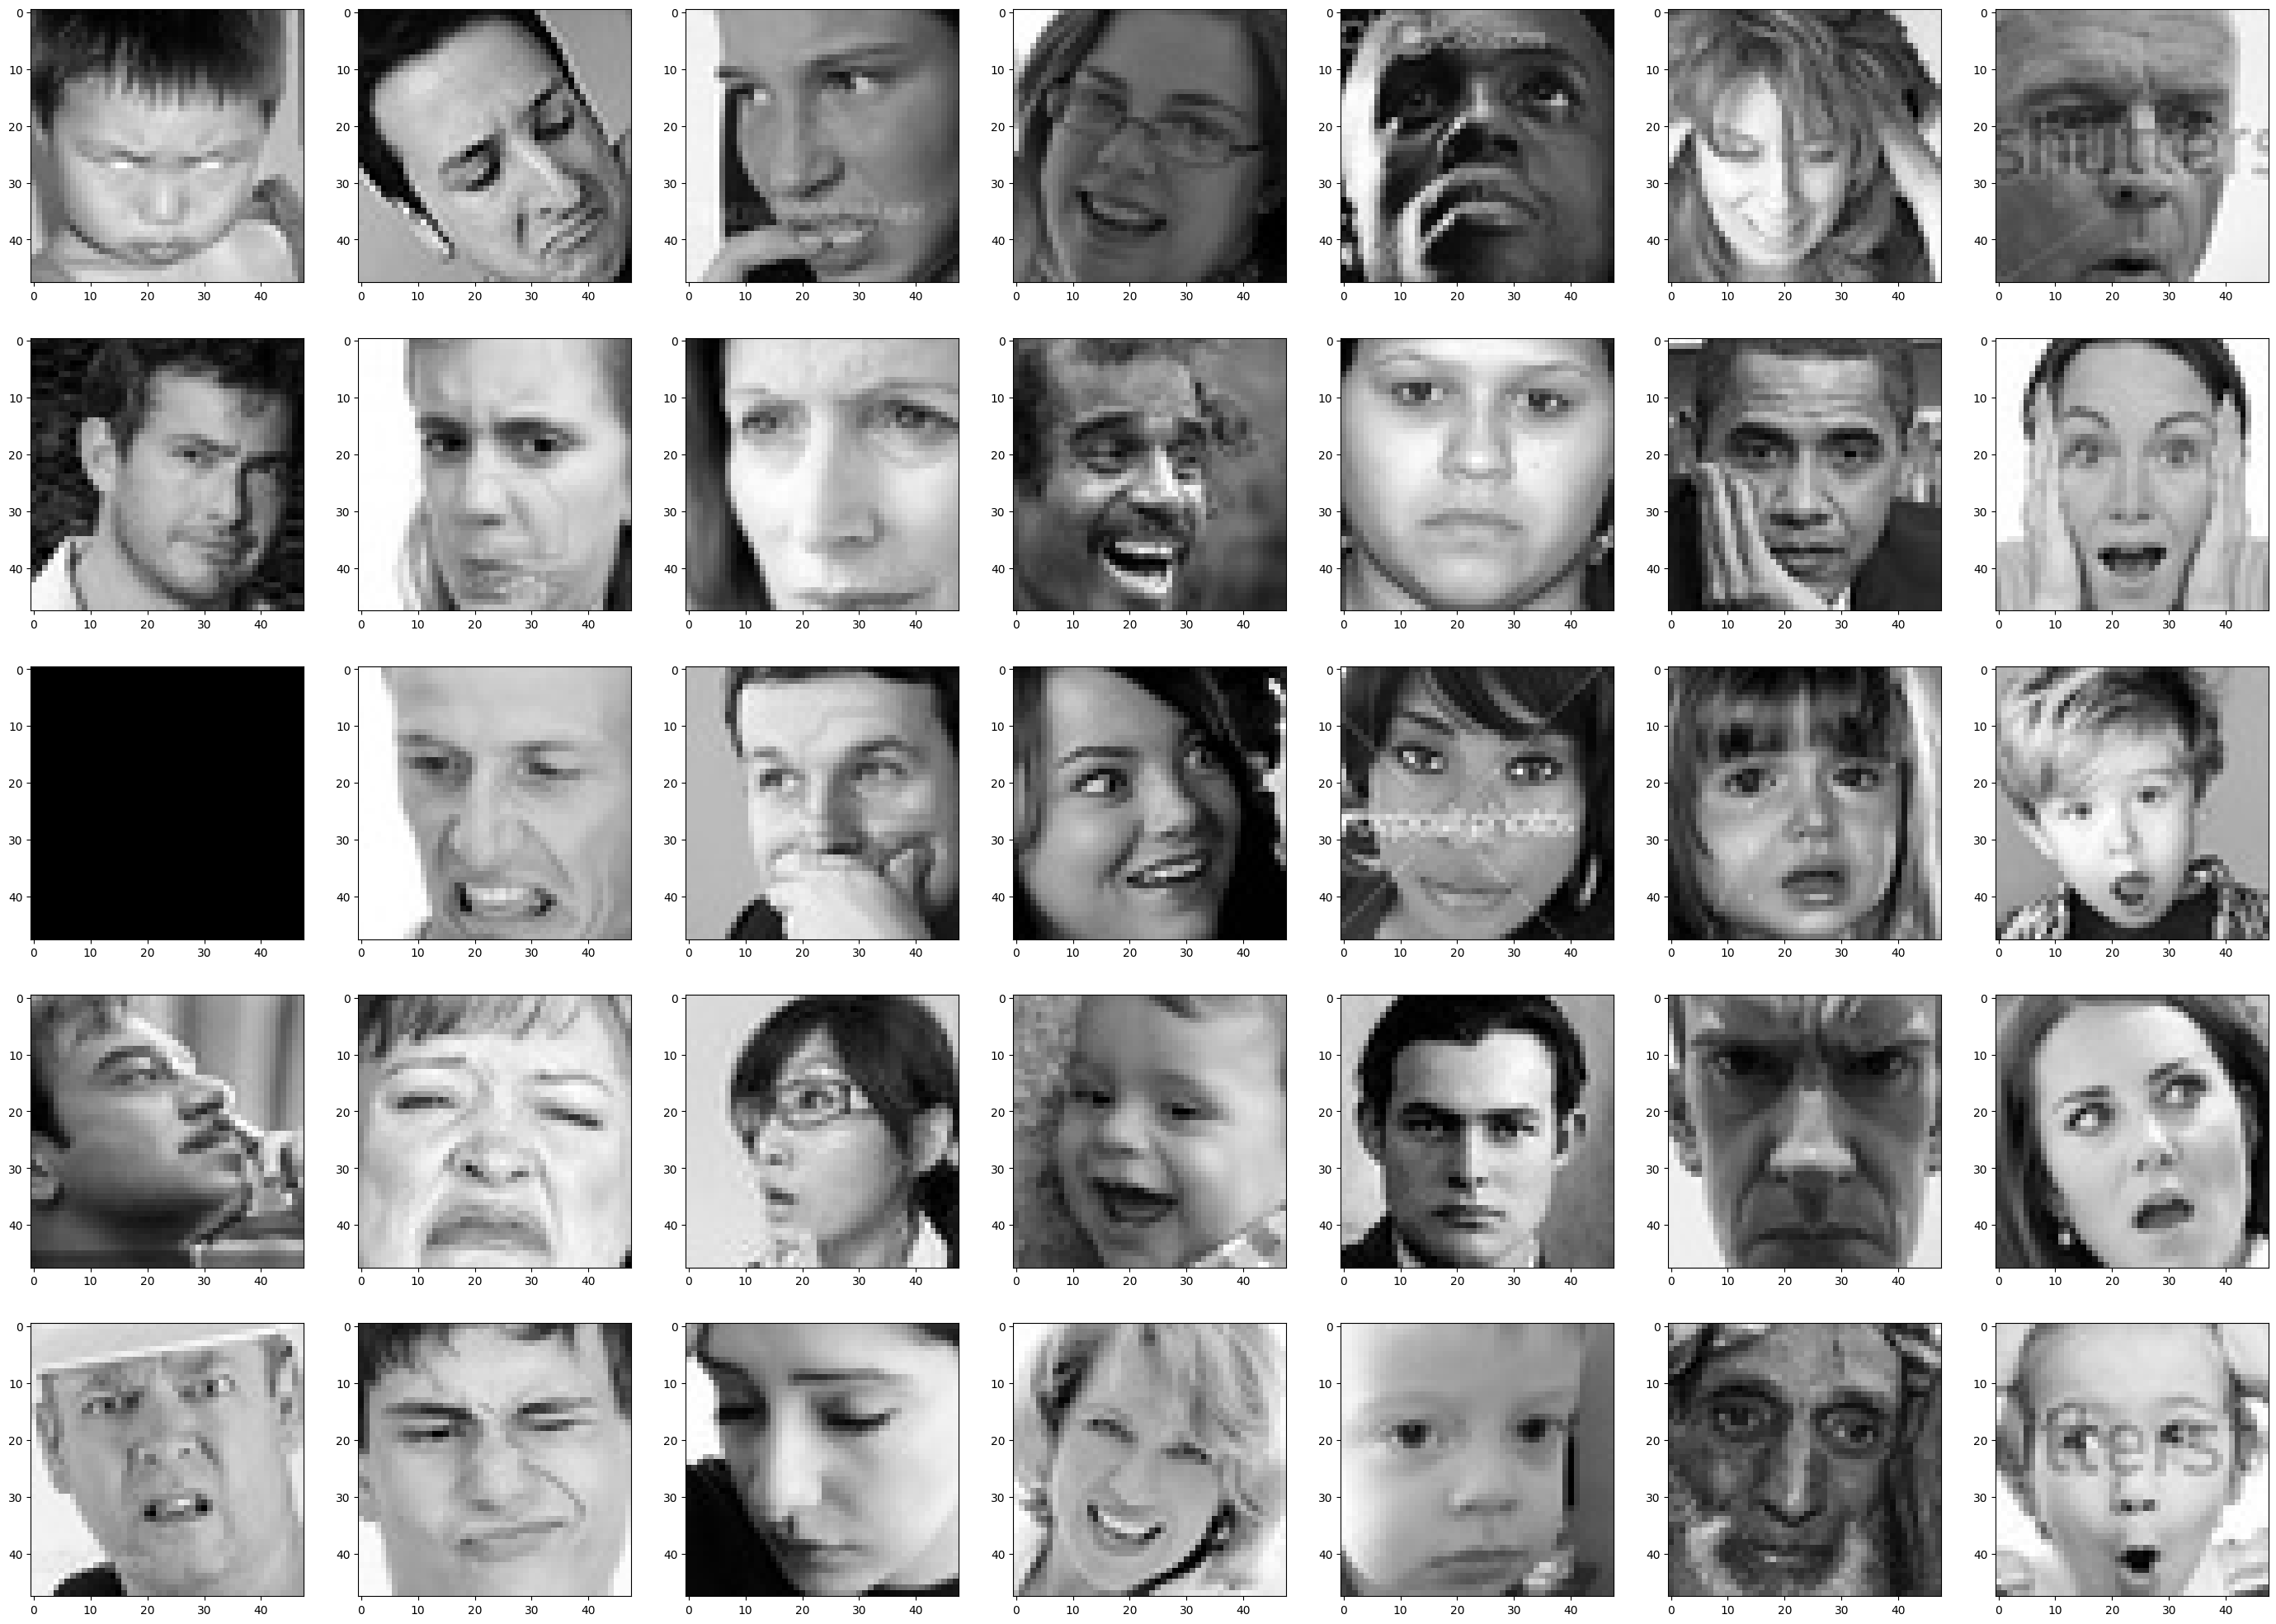

In [10]:
import os
from skimage.io import imread
import matplotlib.pyplot as plt

train_dir = "E:/notes/LetsGrowMore/Task05/archive/train/"
test_dir = "E:/notes/LetsGrowMore/Task05/archive/test/"
total_labels = len(os.listdir(train_dir))

fig, ax = plt.subplots(nrows=5, ncols=total_labels, figsize=(35, 25))

# Loop through the images and display them
for x in range(5):  # For 5 rows
    for y, v in zip(range(total_labels), os.listdir(train_dir)):  # Loop through labels
        img_dir = os.path.join(train_dir, v)  # Correctly join paths
        img_file = os.path.join(img_dir, os.listdir(img_dir)[x])  # Access image files
        ax[x][y].imshow(imread(img_file), cmap='gray')  # Display the image

plt.show()

C:\Users\Souymo Tewari\AppData\Local\Temp\ipykernel_10956\1555939458.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y="total", palette="flare", data=df)


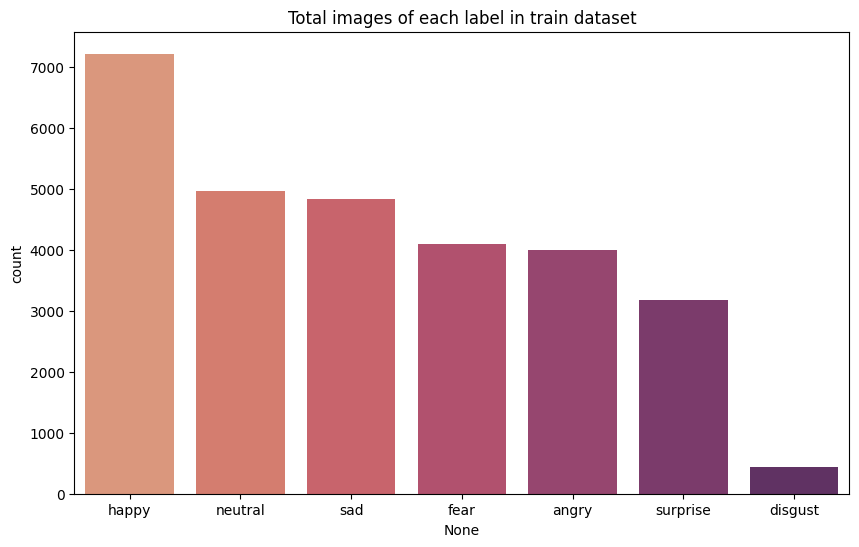

In [11]:
df = {}
for i in os.listdir(train_dir):
    directory = train_dir + i
    df[i] = len(os.listdir(directory))
df = pd.DataFrame(df, index=["total"]).transpose().sort_values("total", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=df.index, y="total", palette="flare", data=df)
plt.ylabel("count")
plt.title("Total images of each label in train dataset")
plt.show()

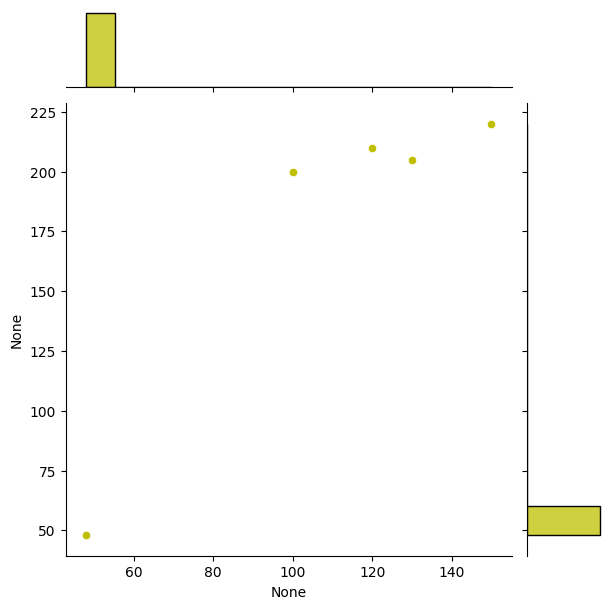

In [12]:
happy = os.listdir(train_dir+'happy/')
# Assuming dim1 and dim2 are lists of dimensions
dim1 = [100, 150, 120, 130]  # Example data
dim2 = [200, 220, 210, 205]  # Example data
for img_filename in happy:
    img = imread(train_dir+'happy/'+img_filename)
    d1, d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)
img_shape = (int(np.mean(dim1)), int(np.mean(dim2)), 1)
# Plot using jointplot with keyword arguments for x and y
sns.jointplot(x=dim1, y=dim2, color='y')
plt.show()

In [13]:
train_gen = ImageDataGenerator(rescale=1/255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

test_gen = ImageDataGenerator(rescale=1/255)

img_shape = (int(np.mean(dim1)), int(np.mean(dim2)), 1)

train_generator = train_gen.flow_from_directory(directory=train_dir,
                                                target_size=(img_shape[0], img_shape[1]),
                                                color_mode='grayscale',
                                                batch_size=64,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_gen.flow_from_directory(directory=test_dir,
                                                target_size=(img_shape[0], img_shape[1]),
                                                color_mode='grayscale',
                                                batch_size=64,
                                                class_mode='categorical',
                                                shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [14]:
# Create the Model
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=img_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=len(os.listdir(train_dir)), activation='softmax'))

model.summary()

C:\Users\Souymo Tewari\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,921,799 (22.59 MB)

 Trainable params: 5,919,367 (22.58 MB)

 Non-trainable params: 2,432 (9.50 KB)

In [15]:
# Train the model
model.compile(optimizer=Adam(learning_rate=0.0001, 
                             decay=1e-6), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

C:\Users\Souymo Tewari\AppData\Roaming\Python\Python312\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [16]:
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = test_generator.n // test_generator.batch_size
num_epochs = 20

history = model.fit(train_generator,
                    epochs=num_epochs,
                    verbose=1,
                    #callbacks=callbacks,
                    validation_data=test_generator,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps)

Epoch 1/20


C:\Users\Souymo Tewari\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 817s 2s/step - accuracy: 0.2244 - loss: 1.9973 - val_accuracy: 0.1980 - val_loss: 2.6830
Epoch 2/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 171us/step - accuracy: 0.2344 - loss: 1.7386 - val_accuracy: 0.0000e+00 - val_loss: 5.2834
Epoch 3/20


C:\Users\Souymo Tewari\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


448/448 ━━━━━━━━━━━━━━━━━━━━ 303s 677ms/step - accuracy: 0.2456 - loss: 1.8026 - val_accuracy: 0.2779 - val_loss: 1.7697
Epoch 4/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 81us/step - accuracy: 0.2812 - loss: 1.7917 - val_accuracy: 0.1000 - val_loss: 2.3660
Epoch 5/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 295s 658ms/step - accuracy: 0.2518 - loss: 1.7930 - val_accuracy: 0.2859 - val_loss: 1.7553
Epoch 6/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 85us/step - accuracy: 0.3438 - loss: 1.6722 - val_accuracy: 0.2000 - val_loss: 2.0846
Epoch 7/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 286s 638ms/step - accuracy: 0.2649 - loss: 1.7715 - val_accuracy: 0.3073 - val_loss: 1.7123
Epoch 8/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 111us/step - accuracy: 0.2656 - loss: 1.7210 - val_accuracy: 0.5000 - val_loss: 1.4586
Epoch 9/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 277s 617ms/step - accuracy: 0.2799 - loss: 1.7621 - val_accuracy: 0.3072 - val_loss: 1.7427
Epoch 10/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 90us/step - accuracy: 0.3438 - loss: 1.6796 - val_a

In [17]:
model.save("model.keras")

In [18]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print("validation accuracy :", str(test_acc*100)+"%")
print("validation loss :", test_loss)

113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 114ms/step - accuracy: 0.3420 - loss: 1.6354
validation accuracy : 44.63638961315155%
validation loss : 1.4373654127120972


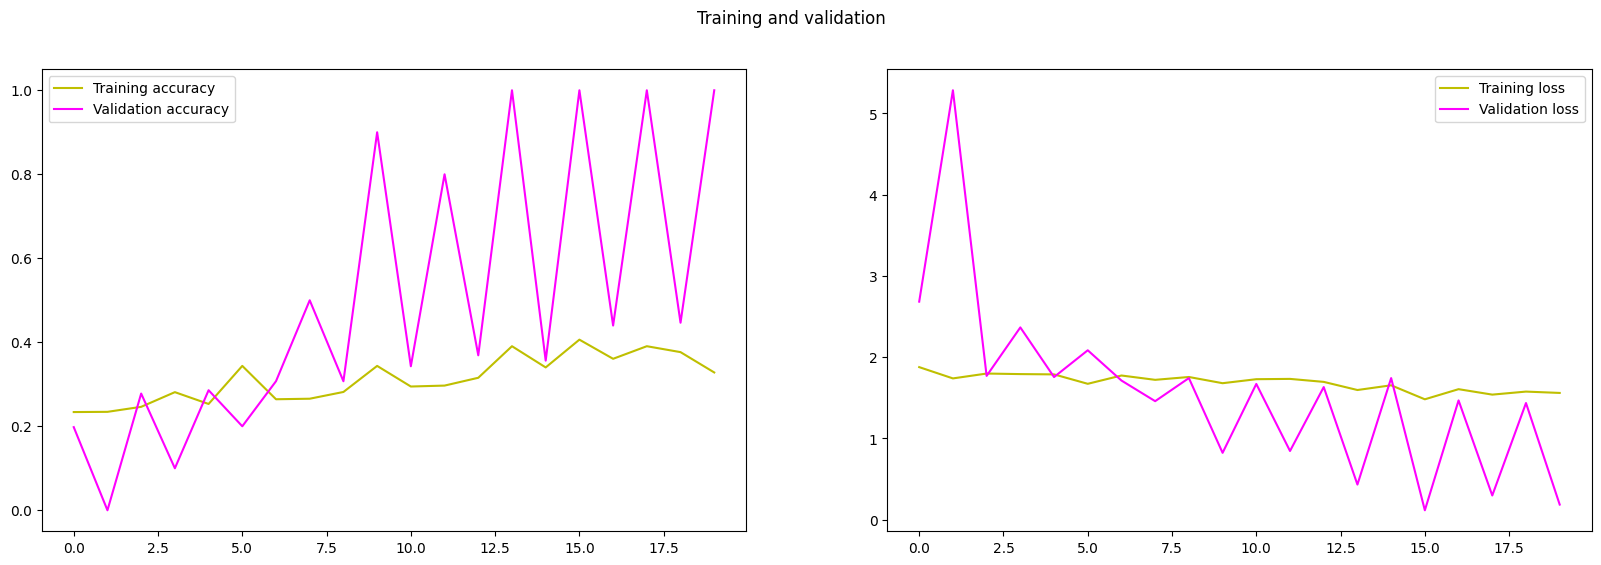

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'magenta', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'magenta', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [21]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.5 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/11.0 MB 1.7 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/11.0 MB 1.7 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/11.0 MB 1.5 MB/s eta 0:00:07
   ------ --------------------------------- 1.8/11.0 MB 1.7 MB/s eta 0:00:06
   -------- ------------------------------- 2.4/11.0 MB 1.8 MB/s eta 0:00:05
   ---------- ----------------------------- 2.9/11.0 MB 1.9 MB/s eta 0:00:05
   ------------ --------------------------- 3.4/11.0 MB 2.0 MB/s eta 0:00:04
   ------------- -------------------------- 3.7/11.0 MB 2.0 MB/s eta 0:00:04
   --------------- ------------------------ 4.2/11.0 MB 2.0 MB/s eta 0:00:04
   ----------------- ---------------------- 4.7/11.0 MB 2.1 MB/s eta 0:00:04
   ----------

113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step
              precision    recall  f1-score   support

       angry       0.29      0.26      0.27       958
     disgust       0.00      0.00      0.00       111
        fear       0.22      0.07      0.11      1024
       happy       0.63      0.76      0.69      1774
     neutral       0.40      0.48      0.44      1233
         sad       0.39      0.19      0.26      1247
    surprise       0.40      0.86      0.55       831

    accuracy                           0.45      7178
   macro avg       0.33      0.37      0.33      7178
weighted avg       0.41      0.45      0.40      7178





C:\Users\Souymo Tewari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Souymo Tewari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Souymo Tewari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

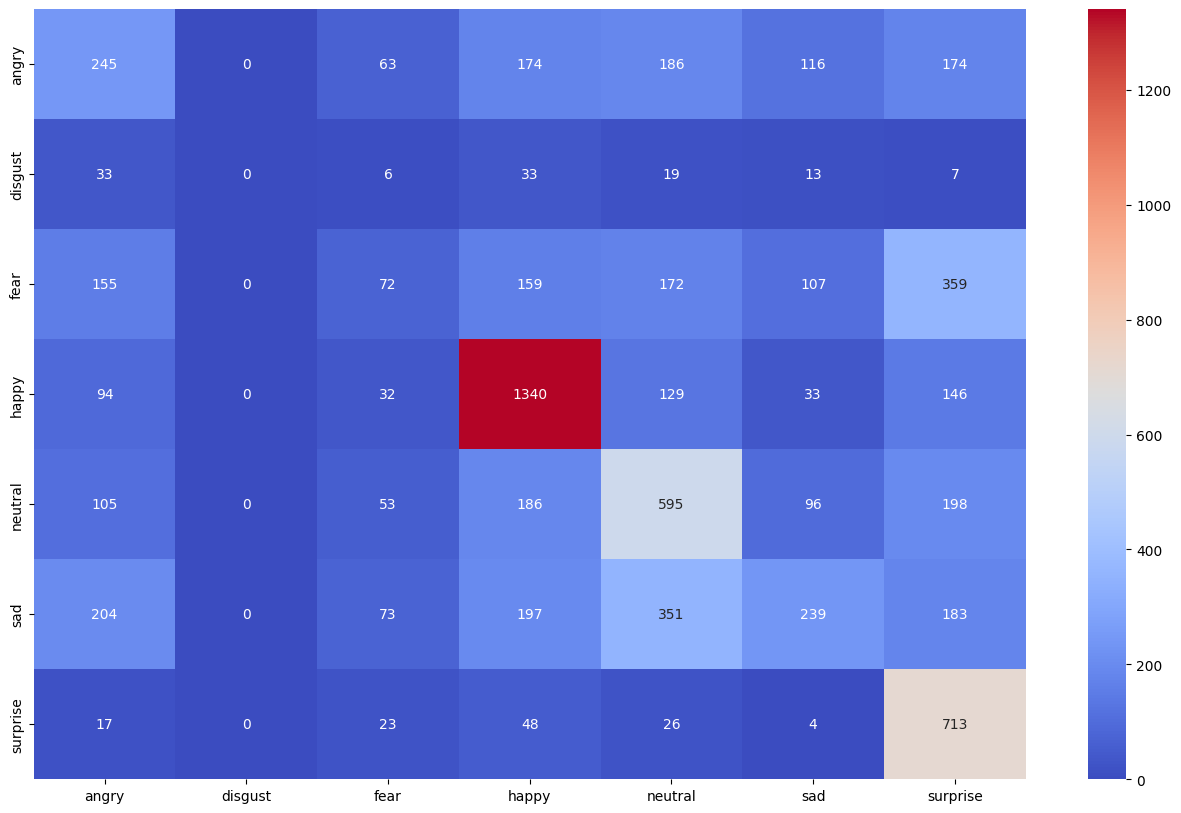

In [22]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(model.predict(test_generator), axis=-1)
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()), end='\n\n\n')
cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(16,10))
sns.heatmap(cm, cmap=plt.cm.coolwarm, annot=True, fmt='.0f', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.show()

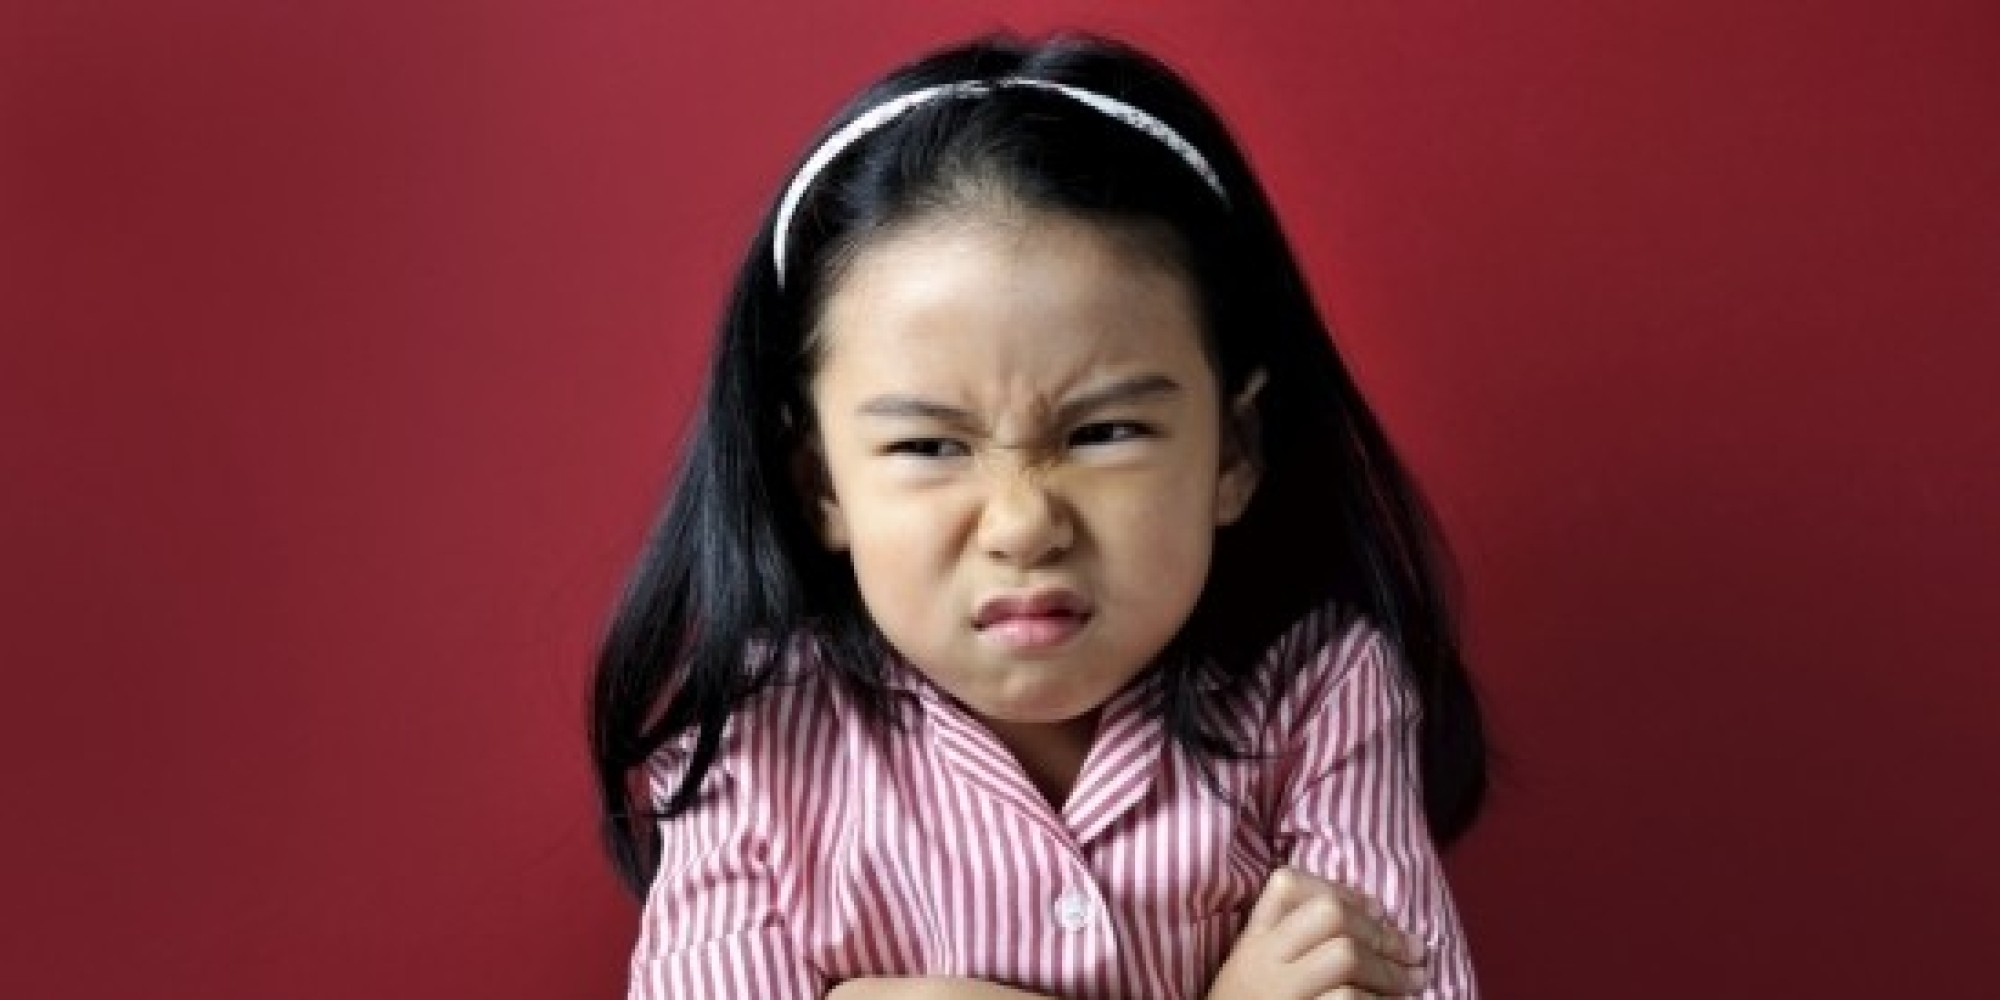

In [42]:
# Testing our model with new image
image = cv2.imread("E:/notes/LetsGrowMore/Task05/image3.jpg")
from IPython.display import Image
Image(filename='E:/notes/LetsGrowMore/Task05/image3.jpg')

In [43]:
model.save("model.h5")

In [44]:
import os
print(os.path.exists("model.h5"))

True


In [49]:
# Model Prediction
import cv2
from tensorflow.python.keras.models import load_model
import os
# # load the trained model
model = tf.keras.models.load_model('model.h5')
# A list of emoticon categories
EMOTIONS = ['Angry', 'Disgust', 'Happy', 'Sad', 'Surprise', 'Neutral']
# Load image
img = image
# Trim the image to 48 x 48, and turn the grayscale image, normalization
frame = cv2.resize(img,(48,48),interpolation=cv2.INTER_BITS2)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) / 255.0
# Reinvent the image dimension
gray = gray.reshape(1,48,48,1)
# Output the prediction
predicts = model.predict(gray)[0]
label = EMOTIONS[predicts.argmax()]
for (i,j) in zip(range(7),EMOTIONS):
    predictss = predicts[i]
    print("{:^10s}".format(j)+"prediction rate is   {0:.2f}%".format(predictss))
print( "\n\n The system considers this expression to be:",label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
  Angry   prediction rate is   0.31%
 Disgust  prediction rate is   0.01%
  Happy   prediction rate is   0.18%
   Sad    prediction rate is   0.22%
 Surprise prediction rate is   0.08%
 Neutral  prediction rate is   0.14%


 The system considers this expression to be: Angry


In [54]:
# Song Recommdation
if (label=='Angry'):
    path="E:\\notes\\LetsGrowMore\\Task05\\archive\\songs\\Angry\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='E:\\notes\\LetsGrowMore\\Task05\\archive\\songs\\Angry\\'+ d,autoplay=True)
    display(audio)
    
elif (label=='Disgust'):
    path="E:\\notes\\LetsGrowMore\\Task05\\archive\\songs\\Disgust\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='E:\\notes\\LetsGrowMore\\Task05\\archive\\songs\\Disgust\\'+ d,autoplay=True)
    display(audio)
    
elif (label=="Happy"):
    path="E:\\notes\\LetsGrowMore\\Task05\\archive\\songs\\Happy\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='E:\\notes\\LetsGrowMore\\Task05\\archive\\songs\\Happy\\'+ d,autoplay=True)
    display(audio)
    
elif (label=='Sad'):
    path="E:\\notes\\LetsGrowMore\\Task05\\archive\\songs\\Sad\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='E:\\notes\\LetsGrowMore\\Task05\\archive\\songs\\Sad\\'+ d,autoplay=True)
    display(audio)
    
elif (label=='Surprise'):
    path="E:\\notes\\LetsGrowMore\\Task05\\archive\\songs\\Surprise\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='E:\\notes\\LetsGrowMore\\Task05\\archive\\songs\\Surprise\\'+ d,autoplay=True)
    display(audio)
    
elif (label=='Neutral'):
    path="sE:\\notes\\LetsGrowMore\\Task05\\archive\\songs\\Neutral\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='E:\\notes\\LetsGrowMore\\Task05\\archive\\songs\\Neutral\\'+ d,autoplay=True)
    display(audio)

Now Playing: Angry Mood Off After Breakup.mp3
